In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Defining train and test

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Removing null values

In [37]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(train)
train = pd.DataFrame(imputer.transform(train),columns=('x','y'))

In [38]:
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,0:1].values
y_test = test.iloc[:,-1].values

Generate regressor and fit the data

In [39]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Plotting the training data

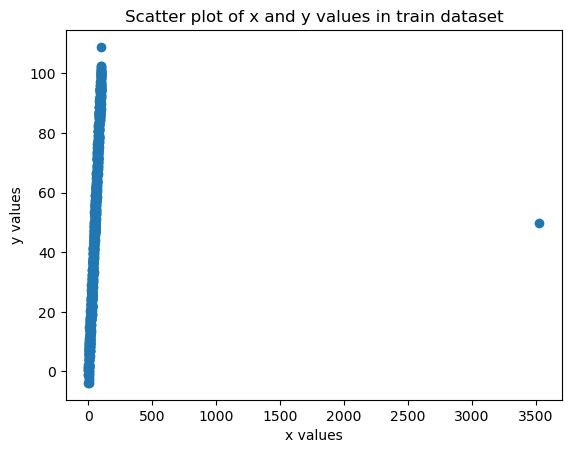

In [40]:
plt.scatter(x=train["x"], y=train["y"])
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter plot of x and y values in train dataset')
plt.show()

Plotting the testing data

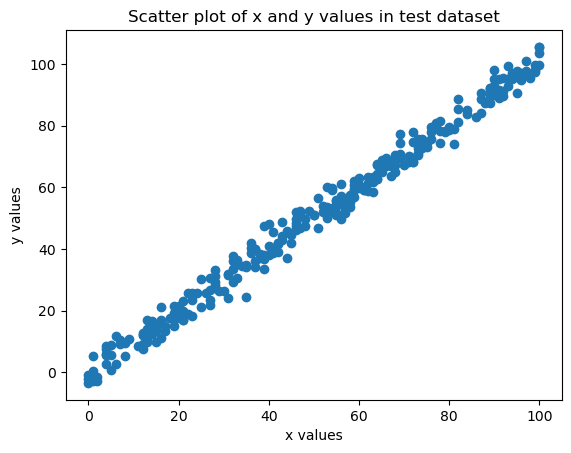

In [41]:
plt.scatter(test["x"],test["y"])
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter plot of x and y values in test dataset')
plt.show()

Doing this, you will get some unexpected graphics!
Because there is a value too high and must be deleted

In [48]:
# Hint: Run a loop to find the index of max vlaue


# Find max value in train dataset 'x' column
print("**TRAIN**")
train_x_col_index = train["x"].idxmax()
print("This is index of Max value of train_dataset in column 'X':",train_x_col_index)
train_x_col_max_value = train["x"].loc[train_x_col_index]
print("This is max value of train_dataset in column 'x':",train_x_col_max_value)

# Find max value in train dataset 'y' column
train_y_col_index = train["y"].idxmax()
print("This is index of Max value of train_dataset in column 'y':",train_y_col_index)
train_y_col_max_value = train["y"].loc[train_y_col_index]
print("This is max value of train_dataset in column 'y':",train_y_col_max_value)

# Find max value in test dataset 'x' column
print("**TEST**")
test_x_col_index = test["x"].idxmax()
print("This is index of Max value of test_dataset in column 'X':",test_x_col_index)
test_x_col_max_value = test["x"].loc[test_x_col_index]
print("This is max value of test_dataset in column 'x':",test_x_col_max_value)

# Find max value in test dataset 'y' column
test_y_col_index = test["y"].idxmax()
print("This is index of Max value of test_dataset in column 'y':",test_y_col_index)
test_y_col_max_value = test["y"].loc[test_y_col_index]
print("This is max value of test_dataset in column 'y':",test_y_col_max_value)



        


**TRAIN**
This is index of Max value of train_dataset in column 'X': 158
This is max value of train_dataset in column 'x': 100.0
This is index of Max value of train_dataset in column 'y': 237
This is max value of train_dataset in column 'y': 102.4967859
**TEST**
This is index of Max value of test_dataset in column 'X': 87
This is max value of test_dataset in column 'x': 100
This is index of Max value of test_dataset in column 'y': 87
This is max value of test_dataset in column 'y': 105.5918375


Now we should delete the index of max value to make data more fit

In [43]:
train.drop(train_x_col_index,axis=0,inplace=True) # fill the index
train.drop(train_y_col_index,axis=0,inplace=True) 
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Again,Plotting the training data

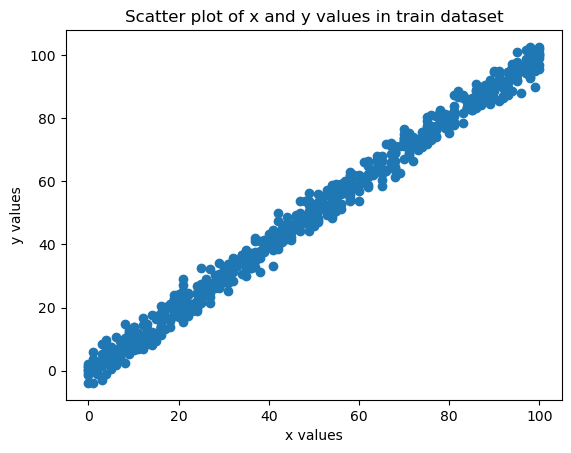

In [49]:
plt.scatter(train["x"], train["y"])
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter plot of x and y values in train dataset')
plt.show()

Again,Plotting the testing data

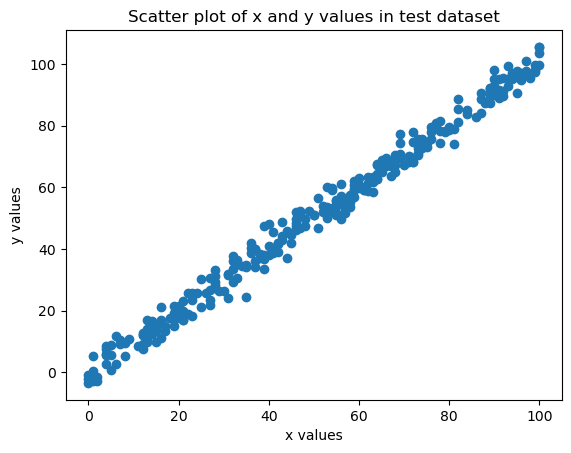

In [50]:
plt.scatter(test["x"],test["y"])
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter plot of x and y values in test dataset')
plt.show()